# **Custom conditional-phase**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
import math
%matplotlib inline

In [3]:
# Set up the program
reg = QuantumRegister(2, name='reg')
qc = QuantumCircuit(reg)

In [4]:
theta = math.pi / 2
qc.h(reg)
qc.rz(theta/2, reg[1])
qc.cx(reg[0], reg[1])
qc.rz(-theta/2, reg[1])
qc.cx(reg[0], reg[1])
qc.rz(-theta/2, reg[0])

In [5]:
qc.barrier()

In [6]:
qc.crz(theta, reg[0], reg[1])

In [7]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

[ 0.462+0.191j -0.191-0.462j  0.462+0.191j  0.191+0.462j]


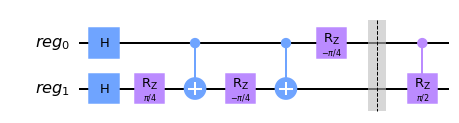

In [8]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw()        # draw the circuit